In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions
import random

In [2]:
pesquisador_1 = np.array([132.91, 131.43, 131.96])
pesquisador_1 = np.array([0.34, 0.12, 1.23, 0.70, 1.75, 0.12])
pesquisador_2 = np.array([133.16, 133.13, 132.74])
pesquisador_2 = np.array([.91, 2.94, 2.14, 2.36, 2.86, 4.55,])
pesquisador_3 = np.array([133.18, 132.11, 132.49])
pesquisador_3 = np.array([6.31, 8.37, 9.75, 6.09, 9.82, 7.24])
pesquisador_4 = np.array([131.68, 131.52, 132.22])
pesquisador_4 = np.array([17.15, 11.82, 10.95, 17.2, 14.35, 16.82])

df = pd.DataFrame({
    "pesquisador_1": pesquisador_1,
    "pesquisador_2": pesquisador_2,
    "pesquisador_3": pesquisador_3,
    "pesquisador_4": pesquisador_4,    
})

alpha = 0.05

In [3]:
df.describe()

,pesquisador_1,pesquisador_2,pesquisador_3,pesquisador_4
count,6.00000,6.000000,6.00000,6.000000
mean,0.71000,2.626667,7.93000,14.715000
std,0.66109,1.192202,1.64707,2.800891
min,0.12000,0.910000,6.09000,10.950000
25%,0.17500,2.195000,6.54250,12.452500
50%,0.52000,2.610000,7.80500,15.585000
75%,1.09750,2.920000,9.40500,17.067500
max,1.75000,4.550000,9.82000,17.200000


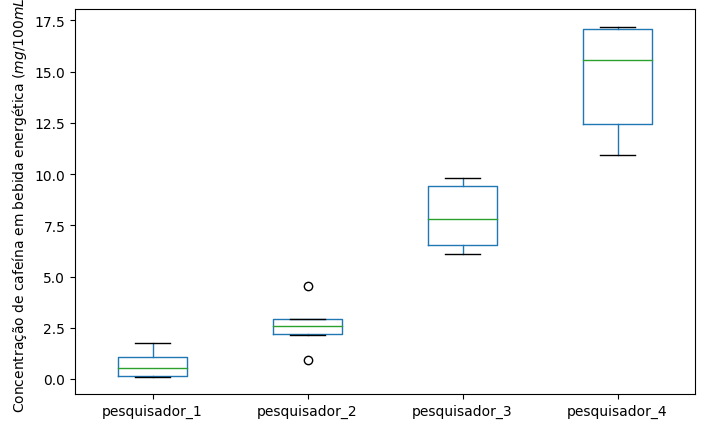

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(grid=False, ax=ax)
ax.set_ylabel("Concentração de cafeína em bebida energética ($mg/100mL$)")

plt.show()

In [5]:
levene = stats.levene(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4)
levene

LeveneResult(statistic=4.568440820038776, pvalue=0.013570558150099618)

In [6]:
levene = stats.levene(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4, center="median")
levene

LeveneResult(statistic=4.568440820038776, pvalue=0.013570558150099618)

In [7]:
if levene.pvalue < alpha:
    print("Variâncias não homogêneas")
else:
    print("Variâncias homogêneas")

Variâncias não homogêneas


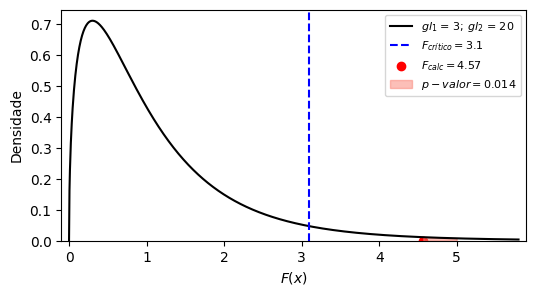

In [8]:
functions.make_f_distribution_plot(levene.statistic, levene.pvalue, gl_numerator=df.shape[1]-1, gl_denominator=df.shape[0]*df.shape[1] - df.shape[1], alpha=alpha)

In [9]:
stats.f_oneway(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4)

F_onewayResult(statistic=76.06687624920616, pvalue=4.1111804793212526e-11)

In [10]:
def levene(*samples, center='median', proportiontocut=0.05):

    if center not in ['mean', 'median', 'trimmed']:
        raise ValueError("center must be 'mean', 'median' or 'trimmed'.")

    k = len(samples)
    if k < 2:
        raise ValueError("Must enter at least two input sample vectors.")
    # check for 1d input
    for j in range(k):
        if np.asanyarray(samples[j]).ndim > 1:
            raise ValueError('Samples must be one-dimensional.')

    Ni = np.empty(k)
    Yci = np.empty(k, 'd')

    if center == 'median':
        func = lambda x: np.median(x, axis=0)
    elif center == 'mean':
        func = lambda x: np.mean(x, axis=0)
    else:  # center == 'trimmed'
        samples = tuple(_stats_py.trimboth(np.sort(sample), proportiontocut)
                        for sample in samples)
        func = lambda x: np.mean(x, axis=0)

    for j in range(k):
        Ni[j] = len(samples[j])
        Yci[j] = func(samples[j])
    Ntot = np.sum(Ni, axis=0)
    # print(Ntot) # gl totais

    # compute Zij's
    Zij = [None] * k
    for i in range(k):
        Zij[i] = abs(np.asarray(samples[i]) - Yci[i])
        
    # print(Zij) # arrays com os valores transformados

    # compute Zbari
    Zbari = np.empty(k, 'd')
    
    
    Zbar = 0.0
    for i in range(k):
        Zbari[i] = np.mean(Zij[i], axis=0)
        Zbar += Zbari[i] * Ni[i]
    # print(Zbari) # media de cada grupo para anova
    # print(Zbar)
    Zbar /= Ntot
    numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0) # this is SQtreatments * gl_erros
    print(np.sum(Ni * (Zbari - Zbar)**2, axis=0))
    print((Ntot - k))
    # compute denom_variance
    dvar = 0.0
    for i in range(k):
        dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)

    denom = (k - 1.0) * dvar # this is SEqerros * gl_trat
    print(dvar)

    W = numer / denom
    pval = stats.f.sf(W, k-1, Ntot-k)  # 1 - cdf
    return (W, pval)

levene(pesquisador_1, pesquisador_2, pesquisador_3, pesquisador_4)

11.569679166666663
20.0
16.88348333333335


(4.568440820038776, 0.013570558150099618)

In [11]:
231/50

4.62